In [2]:
!where conda
#Two ways to install  graphviz
#1) !pip install graphviz   
#2) conda remove graphviz  --- conda install python-graphviz

In [16]:
#arbol de desicion
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

dataset = [load_iris(), load_breast_cancer()]
dataset_names = ["Iris", "Breast_Cancer"]

#df = df.drop(df.columns[-1],axis=1)

def arbol_entropy(X_entrena,y_entrena): 
              
    arbol=DecisionTreeClassifier(criterion = "entropy",random_state = 50,max_depth=2, min_samples_leaf=1)
    arbol.fit(X_entrena, y_entrena)
    return arbol

def arbol_ginix(X_entrena,y_entrena): 
              
    arbol=DecisionTreeClassifier(criterion = "gini",random_state = 50,max_depth=2, min_samples_leaf=1)
    arbol.fit(X_entrena, y_entrena)
    return arbol
            
                   
def prediction(X_test, arbol): 
  
    y_pred = arbol.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred
    
      

def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix:\n ", 
    confusion_matrix(y_test, y_pred)) 
      
    print ("\nAccuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report :\n ", 
    classification_report(y_test, y_pred)) 
      


def main():
    i=0
    tree_entro, tree_gini = list(),list()
    
    
    for x in dataset:
        print(" =============================       DATSET : ",dataset_names[i], "=====================\n")
        data_set=dataset[i]
        X_entrena, X_test, y_entrena, y_test=train_test_split( data_set.data, data_set.target, test_size = 0.3, random_state = 100) 
        arbol_entro=arbol_entropy(X_entrena,y_entrena)
        arbol_gini=arbol_ginix(X_entrena,y_entrena)


        print("                       ------Results Using Entropy----\n")

        y_pred_entropy = prediction(X_test, arbol_entro) 
        cal_accuracy(y_test, y_pred_entropy)



        print("                       ------Results Using Gini----\n")

        y_pred_gini = prediction(X_test, arbol_gini) 
        cal_accuracy(y_test, y_pred_gini)
        arbol_entro.score(X_test, y_test)
        arbol_entro.score(X_entrena, y_entrena)
        
        
        tree_entro.append(export_graphviz(arbol_entro, out_file='arbol'+ str(i), class_names = data_set.target_names,
                            feature_names = data_set.feature_names, impurity=False, filled=True)) 
        tree_gini.append(export_graphviz(arbol_gini, out_file='arbolGini'+ str(i), class_names = data_set.target_names,
                            feature_names = data_set.feature_names, impurity=False, filled=True)) 
        i=i+1
        print("-----------------------------------  NUEVO ------------------------------------------------------\n")
        

          
main()



 =============================       DATSET :  Iris =====================

                       ------Results Using Entropy----

Predicted values:
[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]
Confusion Matrix:
  [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]

Accuracy :  95.55555555555556
Report :
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

                       ------Results Using Gini----

Predicted values:
[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]
Confusion Matrix:
  [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]

Accuracy :  95.55555555555556
Report :
                p

In [ ]:
# The next two graphics are the representation of the "tree_entro"          ---- i=0|i=1   

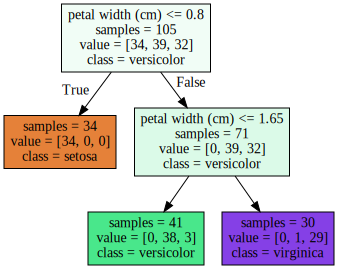

In [23]:
import graphviz
i=0
with open("arbol"+str(i)) as f:
    dot_graph = f.read()

# remove the display(...)
graphviz.Source(dot_graph)

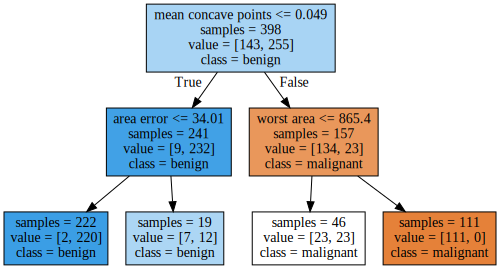

In [22]:
i=1
with open("arbol"+str(i)) as f:
    dot_graph = f.read()

# remove the display(...)

graphviz.Source(dot_graph)

In [ ]:
# The next two graphics are the representation of the "tree_Gini"   ---- i=0|i=1

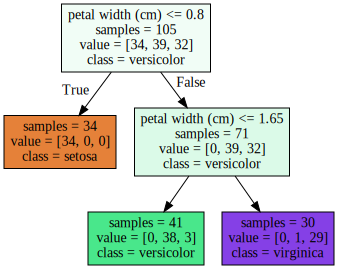

In [24]:
import graphviz
i=0
with open("arbolGini"+str(i)) as f:
    dot_graph = f.read()

# remove the display(...)
graphviz.Source(dot_graph)

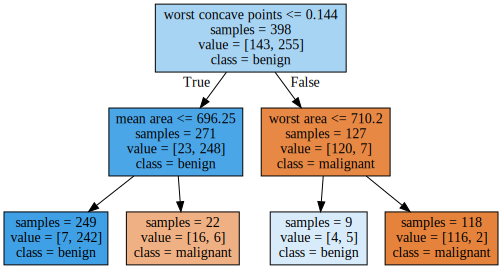

In [25]:
import graphviz
i=1
with open("arbolGini"+str(i)) as f:
    dot_graph = f.read()

# remove the display(...)
graphviz.Source(dot_graph)